In [1]:
# Read the linkedin.csv file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('linkedin.csv')
df.head()

,age2018,gender,Background_photo,Background_topic,O_Background_art,E_Background_HumanInteractions,Profile_photograph,A_Smile_Coder1,A_Smile_Coder2,A_MeanSmile,...,Opennes_1Indicator,Conscientiousness_Nb_Indicators,Conscientiousness_3Indicators,Conscientiousness_2Indicators,Conscientiousness_1Indicator,Openness_scale,Conscientiousness_scale,Extraversion_scale,Agreeableness_scale,Neuroticism_scale
0,23.0,1,0,NaN,0.0,0.0,1,3.0,4.0,3.5,...,0.0,2.0,0.0,1.0,1.0,3.98,3.53,4.12,3.28,3.00
1,23.0,1,0,NaN,0.0,0.0,1,7.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,4.22,4.62,4.32,4.18,2.33
2,23.0,1,0,NaN,0.0,0.0,1,6.0,6.0,6.0,...,0.0,2.0,0.0,1.0,1.0,3.05,3.78,3.20,3.62,3.23
3,30.0,1,0,NaN,0.0,0.0,1,4.0,3.0,3.5,...,0.0,0.0,0.0,0.0,0.0,3.68,4.78,3.75,4.15,1.90
4,23.0,1,0,NaN,0.0,0.0,1,7.0,6.0,6.5,...,1.0,1.0,0.0,0.0,1.0,4.08,3.13,3.80,3.22,2.93


In [2]:
# Make all columns lowercase
df.columns = map(str.lower, df.columns)

# Rename openess_scale to "o", conscientiousness_scale to "c", extraversion_scale to "e", agreeableness_scale to "a", and neuroticism_scale to "n"
df.rename(columns={'openness_scale':'o', 'conscientiousness_scale':'c', 'extraversion_scale':'e', 'agreeableness_scale':'a', 'neuroticism_scale':'n'}, inplace=True)

In [3]:
# Normalise "o", "c", "e", "a", and "n" columns to be between 0 and 1
df['o'] = (df['o'] - df['o'].min()) / (df['o'].max() - df['o'].min())
df['c'] = (df['c'] - df['c'].min()) / (df['c'].max() - df['c'].min())
df['e'] = (df['e'] - df['e'].min()) / (df['e'].max() - df['e'].min())
df['a'] = (df['a'] - df['a'].min()) / (df['a'].max() - df['a'].min())
df['n'] = (df['n'] - df['n'].min()) / (df['n'].max() - df['n'].min())

In [4]:
# Get all columns starting with "o_", "c_", "e_", "a_", and "n_"

# Create a list of columns to keep
keep = ['o', 'c', 'e', 'a', 'n']
for col in df.columns:
    if col.startswith('o_') or col.startswith('c_') or col.startswith('e_') or col.startswith('a_') or col.startswith('n_'):
        keep.append(col)

# Create a list of columns to drop
drop = [col for col in df.columns if col not in keep]

# Drop the columns
df.drop(drop, axis=1, inplace=True)


In [5]:
# Take the average of "e_number_connections_Coder1" and "e_number_connections_Coder2" and store it in a new column "e_number_connections"
df['e_number_connections'] = (df['e_number_connections_coder1'] + df['e_number_connections_coder2']) / 2

# Drop "e_number_connections_Coder1" and "e_number_connections_Coder2"
df.drop(['e_number_connections_coder1', 'e_number_connections_coder2'], axis=1, 
inplace=True)

# Do the same thing for "e_number_skills_..."

df['e_number_skills'] = (df['e_number_skills_coder1'] + df['e_number_skills_coder2']) / 2
df.drop(['e_number_skills_coder1', 'e_number_skills_coder2'], axis=1,
inplace=True)


In [6]:
cols_that_start_with_to_drop = ["o_languages_", "o_influencers_", "e_connections_", "e_skills", "a_smile"]

# Drop the columns that start with the strings in cols_that_start_with_to_drop

keep = ["o", "c", "e", "a", "n"]

for col in df.columns:
    if col.startswith(tuple(cols_that_start_with_to_drop)):
        continue
    else:
        keep.append(col)

drop = [col for col in df.columns if col not in keep]

df.drop(drop, axis=1, inplace=True)

In [7]:
# Remove the rows with missing values
df.dropna(inplace=True)

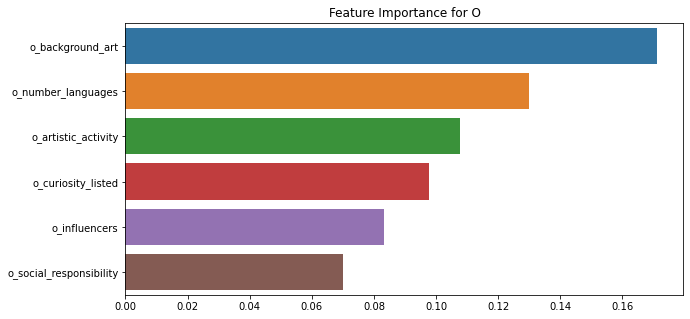

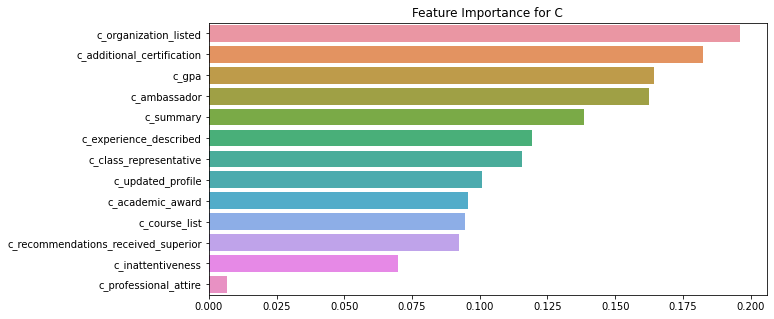

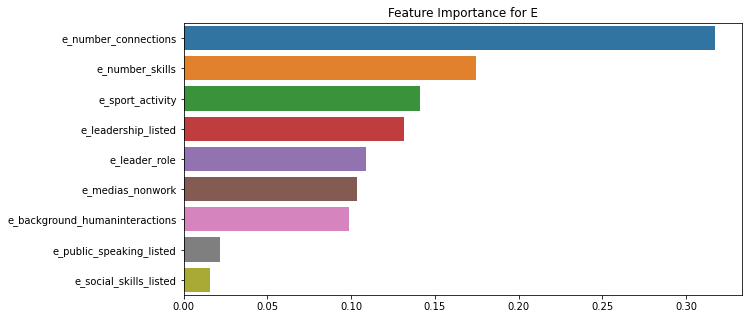

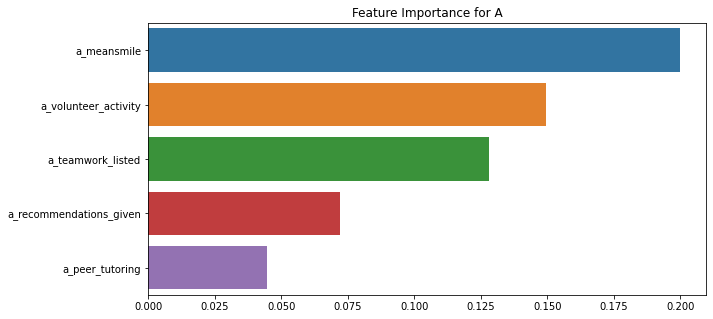

In [8]:
# Given some personality vector "p" and a column name "col", return the feature importance of "col" in "p"
def calc_feat_imp(p):
    # Get all features that start with "p_"
    features = [f for f in df.columns if f.startswith(p + '_')]

    # Calculate the feature importance of each feature in the following format: (feature, importance)
    feat_imp = [(f, np.abs(df[f].corr(df[p]))) for f in features]

    # Sort the feature importance by importance
    feat_imp.sort(key=lambda x: x[1], reverse=True)

    # Return the feature importance
    return feat_imp

# Plot graphs of the feature importance of each personality trait
def plot_feat_imp(p):
    # Get the feature importance
    feat_imp = calc_feat_imp(p)

    # Get the feature names and importance
    features, importance = zip(*feat_imp)

    features = np.array(features)
    importance = np.array(importance)

    # Plot the feature importance
    plt.figure(figsize=(10, 5))
    sns.barplot(x=importance, y=features)
    plt.title('Feature Importance for ' + p.upper())

    # Save the plot with light gray background in img folder
    plt.savefig('img/' + p + '_feat_imp.png', transparent=True, bbox_inches='tight', pad_inches=0.1, facecolor='#f0f0f0')

# Plot the feature importance of each personality trait
plot_feat_imp('o')
plot_feat_imp('c')
plot_feat_imp('e')
plot_feat_imp('a')


Predicting o using SVR...
0.025567552370967882
Predicting c using SVR...
0.04997152587167019
Predicting e using SVR...
0.018392737330078957
Predicting a using SVR...
0.01943007838452279


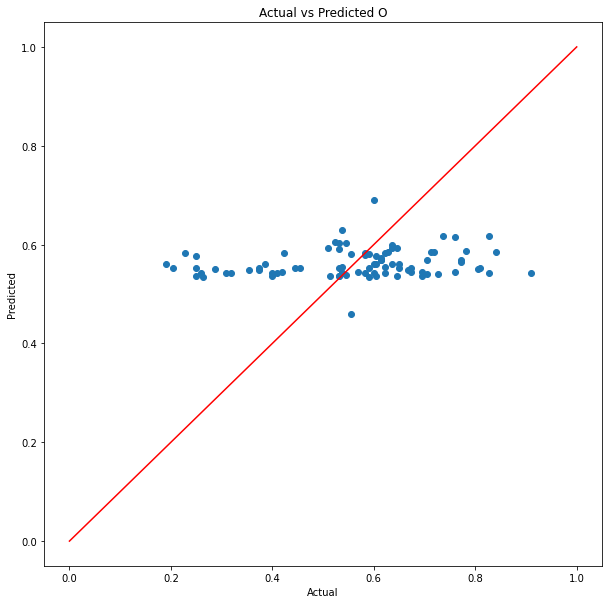

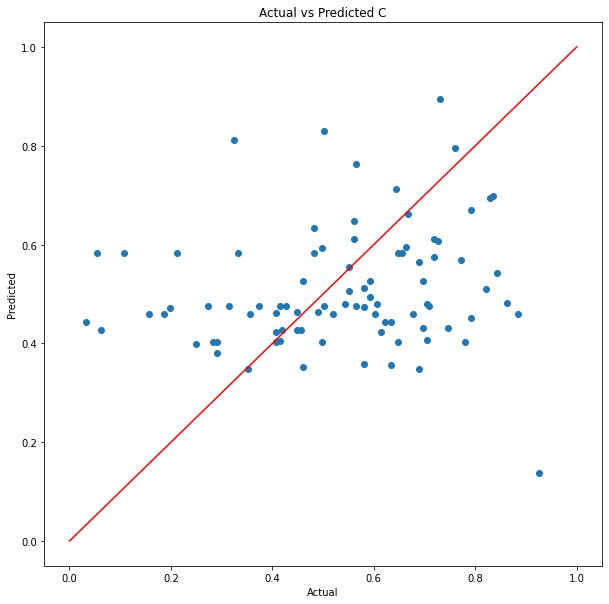

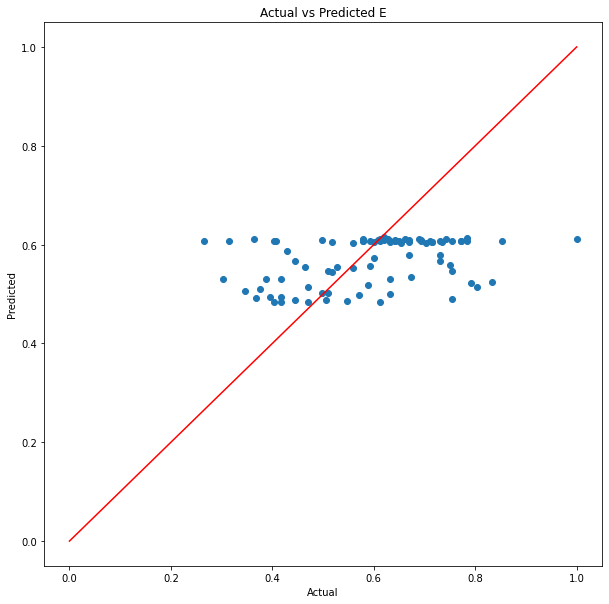

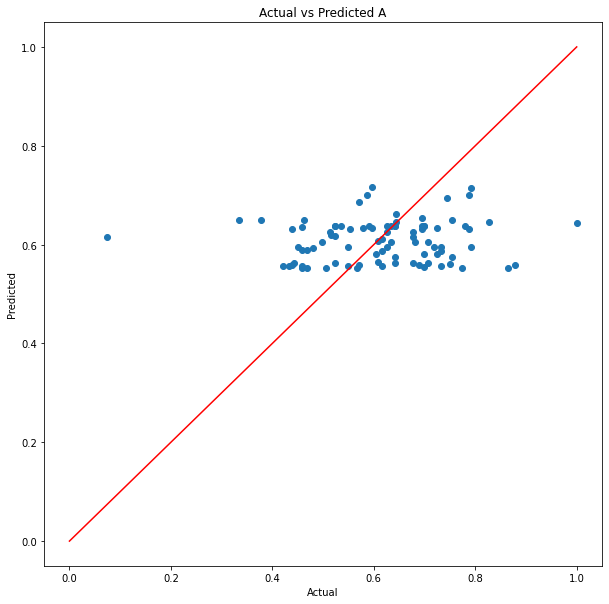

In [15]:
# Predict the "o" score using the "o_" features using a SVM with PUK kernel. "o" is a continuous variable, so use a regression model.

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def predict_using_svr(p):

    print("Predicting " + p + " using SVR...")

    # Get all features that start with p + "_"
    features = df.columns[df.columns.str.startswith(p + '_')]
    X = df[features]
    y = df[p]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a SVR model with a PUK kernel
    model = SVR(kernel='poly', degree=3)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Show predictions vs actual values. Each axis is between 0 and 1. Show a line of best fit.
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, y_pred)
    plt.plot([0, 1], [0, 1], color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted ' + p.upper())

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(mse)

for p in ['o', 'c', 'e', 'a']:
    predict_using_svr(p)

Predicting o using Random Forest...
0.03136618114209449
Predicting c using Random Forest...
0.04588104131250439
Predicting e using Random Forest...
0.02314999259884393
Predicting a using Random Forest...
0.02556682528809474


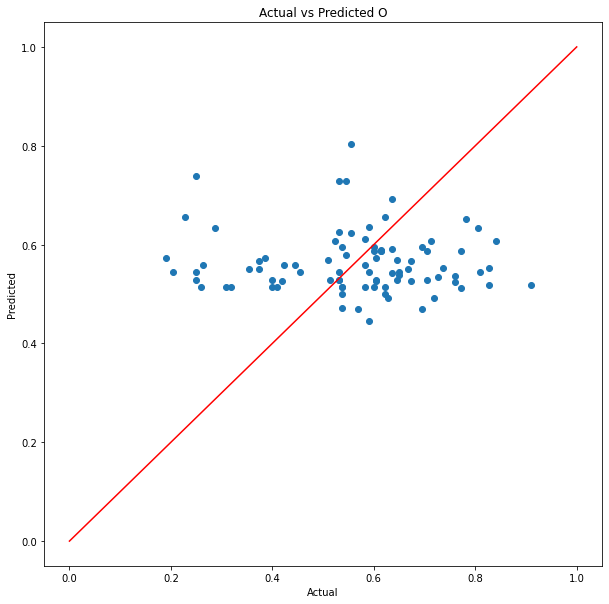

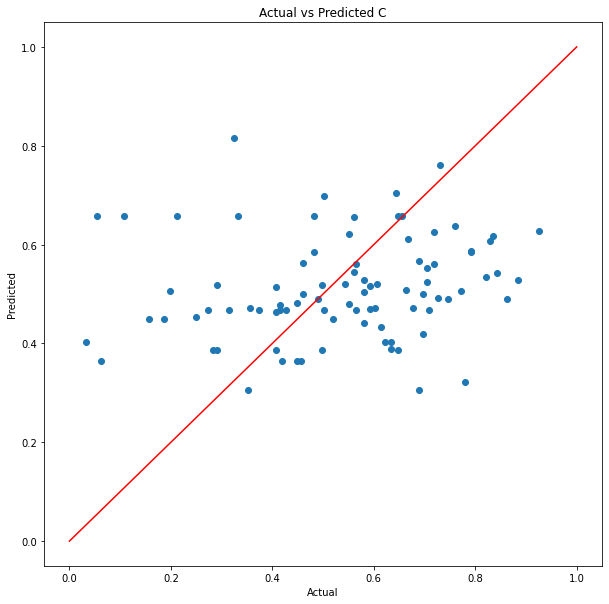

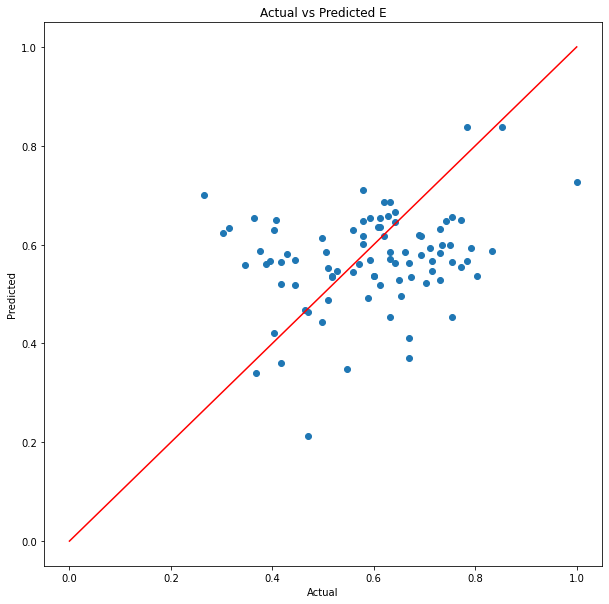

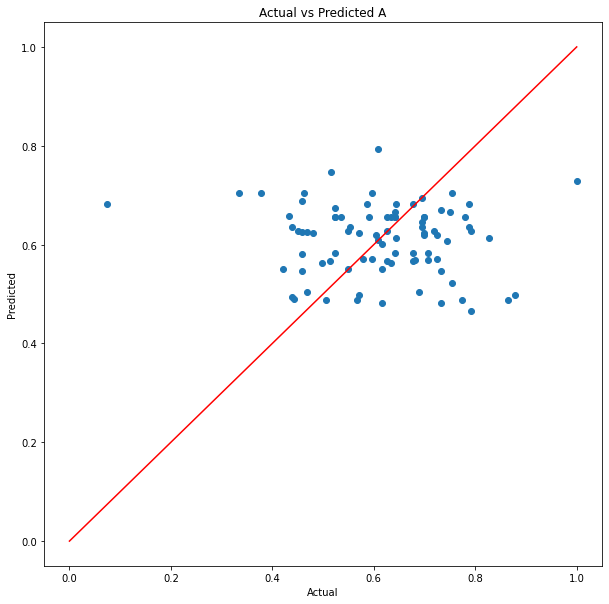

In [10]:
# Same as above, but use a random forest model
from sklearn.ensemble import RandomForestRegressor

def predict_using_random_forest(p):

    print("Predicting " + p + " using Random Forest...")

    features = [f for f in df.columns if f.startswith(p + '_')]
    X = df[features]
    y = df[p]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, y_pred)
    plt.plot([0, 1], [0, 1], color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted ' + p.upper())

    mse = mean_squared_error(y_test, y_pred)
    print(mse)

for p in ['o', 'c', 'e', 'a']:
    predict_using_random_forest(p)